# 한글 워드 클라우드 - 여친선물

#### KoNLPy 설치
- 'Konlpy 오류시 참고'로 검색
- jpype downloda(https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype)
- 본인의 파이썬 버전에 맞게 설치 (예:Python 3.8)
- version : JPype1-1.1.2-cp38-cp38-win_amd64.whl
- download 프로그램이 있는 디렉토리로 이동
- pip install JPype1-1.1.2-cp38-cp38-win_amd64.whl
- conda activate base
- pip install konlpy
- 관리자 권한으로 cmd 실행
- pip install tweepy==3.10.0
- vscode 재실행

In [1]:
import konlpy
konlpy.__version__

'0.5.2'

In [2]:
# Open Korean Text
from konlpy.tag import Okt
okt = Okt()
okt.nouns('해당 에러가 발생하는 것을 알 수 있다.')

['해당', '에러', '발생', '것', '알', '수']

### 여친 선물 - 워드 클라우드 만들기

In [21]:
with open('data/gift.txt', encoding='utf8') as file:
    gift_text = file.read()

In [22]:
tokens = okt.nouns(gift_text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [23]:
# 한글 이외의 글자는 제거
import re
new_tokens =[]
for token in tokens:
    new_token = re.sub('[^가-힣 ]', '', token)
    if new_token:                       # ''는 포함시키지 말 것
        new_tokens.append(new_token)

In [24]:
# 한글 폰트 사용
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

- 엉터리 단어 제거 - 수동으로 반복 처리

In [25]:
import nltk

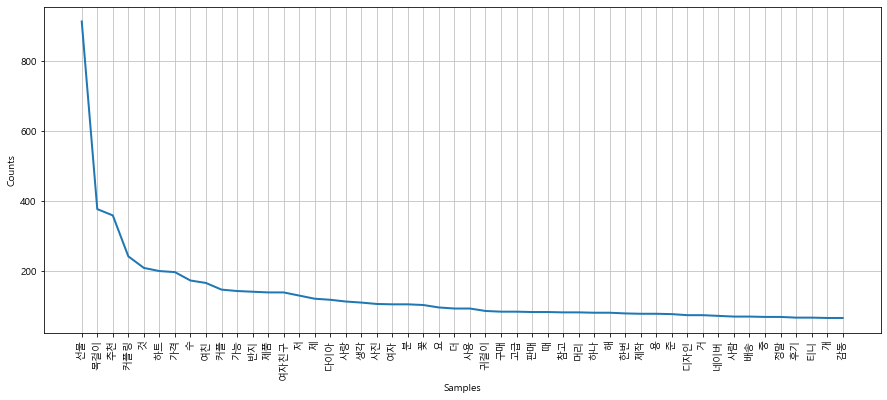

In [26]:
gf_gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [27]:
stop_list = ['선물','추천']
stop_words = '요 더 사용 구매 고급 판매 때 참고 머리 하나 선물 추천 것 가격 수 여친 커플 가능 제품 여자친구 체 제 사랑 여자 분'
stop_list = stop_words.split()

'''new_token_list = []
for token in new_tokens:
    if token not in stop_list:
        new_token_list.append(token)
new_tokens = new_token_list'''
new_tokens = [token for token in new_tokens if token not in stop_list]

- 워드 클라우드 그리기

In [28]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [17]:
data = gf_gift.vocab().most_common(300)
data[:10]

[('목걸이', 378),
 ('커플링', 243),
 ('하트', 201),
 ('반지', 142),
 ('저', 131),
 ('다이아', 119),
 ('생각', 111),
 ('사진', 107),
 ('꽃', 104),
 ('귀걸이', 87)]

In [29]:
wc = WordCloud(
    font_path='c:/windows/Fonts/malgun.ttf',
    relative_scaling=0.2,
    background_color='white'
    ).generate_from_frequencies(dict(data))

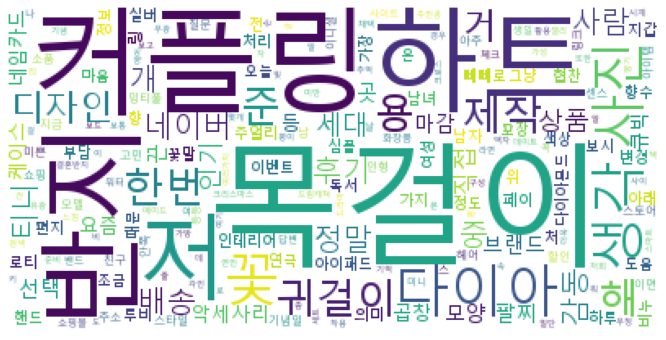

In [30]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [31]:
# 하트 그림에 표시하기
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('data/heart.jpg'))
image_colors=ImageColorGenerator(mask)

In [34]:
wc = WordCloud(
    font_path='c:/windows/Fonts/malgun.ttf',
    relative_scaling=0.3, mask=mask,
    background_color='white',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

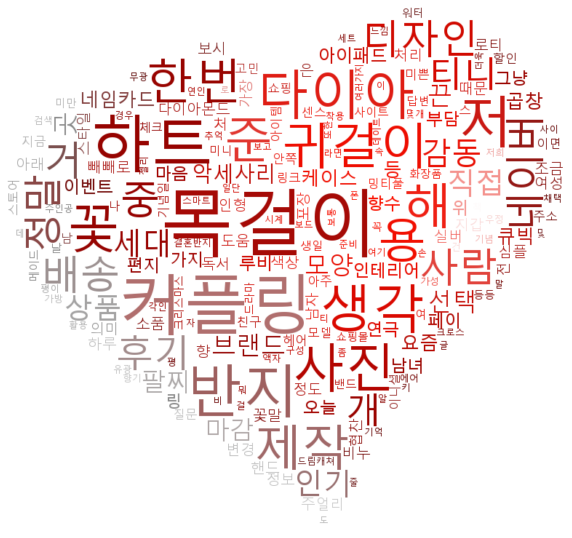

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()